# Working with Hugging Face

## Getting Started with Hugging Face

### Searching the Hub with Python

The Hugging Face Hub provides a nice user interface for searching for
models and learning more about them. At times, you may find it
convenient to be able to do the same thing without leaving the
development environment. Fortunately, Hugging Face also provides a
Python package which allows you to find models through code.

Use the `huggingface_hub` package to find the most downloaded model for
text classification.

`HfApi` and `ModelFilter` from the `huggingface_hub` package is already
loaded for you.

**Instructions**

- Create the instance of the API to the Hugging Face Hub.
- Return a list of one item which is the most downloaded model text
  classification task.
- Store the returned object as a list named `modelList`.

**Answer**


In [2]:
pip install huggingface-hub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# added/edited
from huggingface_hub import HfApi, ModelFilter

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create the instance of the API
api = HfApi()

# Return the filtered list from the Hub
models = api.list_models(
    filter=ModelFilter(task="text-classification"),
    sort="downloads",
    direction=-1,
  	limit=1
)

# Store as a list
modelList = list(models)

print(modelList[0].modelId)

facebook/fasttext-language-identification


/home/vscode/.local/lib/python3.12/site-packages/huggingface_hub/utils/endpoint_helpers.py:247: FutureWarning: 'ModelFilter' is deprecated and will be removed in huggingface_hub>=0.24. Please pass the filter parameters as keyword arguments directly to the `list_models` method.
  warnings.warn(


### Saving a model

There may be situations where downloading and storing a model locally
(i.e. a directory on your computer) is desired. For example, if working
offline.

Practice downloading and saving here. An instance of `AutoModel` is
already loaded for you under the same name.

**Instructions**

- Instantiate the model class for the
  `distilbert-base-uncased-finetuned-sst-2-english` model.
- Save the model as the `modelId` under "models/".

**Answer**


In [5]:
pip install numpy Pillow torch transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# added/edited
from transformers import AutoModel

In [7]:
modelId = "distilbert-base-uncased-finetuned-sst-2-english"

# Instantiate the AutoModel class
model = AutoModel.from_pretrained(modelId)

# Save the model
model.save_pretrained(save_directory=f"models/{modelId}")

### Inspecting datasets

The datasets on Hugging Face range in terms of size, information, and
features. Therefore it's beneficial to inspect it before committing to
loading a dataset into your environment.

Let's inspect the "derenrich/wikidata-en-descriptions-small" dataset.

*Note: this exercise may take a minute due to the dataset size.*

**Instructions**

- Import `load_dataset_builder`.
- Create the dataset builder to inspect the dataset.
- Print the features for the dataset.

**Answer**


In [8]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Load the module
from datasets import load_dataset_builder

# Create the dataset builder
reviews_builder = load_dataset_builder("derenrich/wikidata-en-descriptions-small")

# Print the features
print(reviews_builder.info.features)

{'output': Value(dtype='string', id=None), 'qid': Value(dtype='string', id=None), 'name': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}


### Loading datasets

Hugging Face built the `dataset` package for interacting with datasets.
There are a lot of convenient functions, including
`load_dataset_builder` which we just used. After inspecting a dataset to
ensure its the right one for your project, it's time to load the
dataset! For this, we can leverage input parameters for `load_dataset`
to specify which parts of a dataset to load, i.e. the "train" dataset
for English wikipedia articles.

The `load_dataset` module from the `datasets` package is already loaded
for you. Note: the `load_dataset` function was modified for the purpose
of this exercise.

**Instructions**

- Load the `"wikimedia/wikipedia"` dataset and save as `wikipedia`.

**Answer**


In [10]:
# added/edited
from datasets import load_dataset

In [11]:
# Load the train portion of the dataset
wikipedia = load_dataset("wikimedia/wikipedia", "20231101.en", split="train")  # added/edited

print(f"The length of the dataset is {len(wikipedia)}")

The length of the dataset is 6407814


### Manipulating datasets

There will likely be many occasions when you will need to manipulate a
dataset before using it within a ML task. Two common manipulations are
filtering and selecting (or slicing). Given the size of these datasets,
Hugging Face leverages arrow file types.

This means performing manipulations are slightly different than what you
might be used to. Fortunately, there's already methods to help with
this!

The dataset is already loaded for you under `wikipedia`.

**Instructions**

- Filter the dataset for rows with the term "football" in the `text`
  column and save as `filtered`.
- Select a single example from the filtered dataset and save as
  `example`.

**Answer**


In [12]:
# Filter the documents
filtered = wikipedia.filter(lambda row: "football" in row["text"])

# Create a sample dataset
example = filtered.select(range(1))

print(example[0]["text"])


Alabama () is a state in the Southeastern region of the United States, bordered by Tennessee to the north; Georgia to the east; Florida and the Gulf of Mexico to the south; and Mississippi to the west. Alabama is the 30th largest by area and the 24th-most populous of the U.S. states.

Alabama is nicknamed the Yellowhammer State, after the state bird. Alabama is also known as the "Heart of Dixie" and the "Cotton State". The state tree is the longleaf pine, and the state flower is the camellia. Alabama's capital is Montgomery, and its largest city by population and area is Huntsville. Its oldest city is Mobile, founded by French colonists (Alabama Creoles) in 1702 as the capital of French Louisiana. Greater Birmingham is Alabama's largest metropolitan area and its economic center.

Originally home to many native tribes, present-day Alabama was a Spanish territory beginning in the sixteenth century until the French acquired it in the early eighteenth century. The British won the territory

## Building Pipelines with Hugging Face

### Getting started with pipelines

Hugging Face has an ecosystem of libraries that allow users to leverage
tools at different levels. The `pipeline` module from the `transformers`
library is a great place to get started with performing ML tasks. It
removes the requirement for training models, allowing for quicker
experimentation and results. It does this by being a wrapper around
underlying objects, functions, and processes.

Getting started with pipeline can be done by defining a task or model.
This helps with quick experimentation as you become familiar with the
library.

Create your first pipelines for sentiment analysis. The `input` is a
sentence string that is already loaded for you.

**Instructions**

- Import `pipeline` from the `transformers` library.
- Create the first pipeline by specifying the task "sentiment-analysis"
  and save as `task_pipeline`.
- Create another pipeline but only specify the model,
  `distilbert-base-uncased-finetuned-sst-2-english` and save as
  `model_pipeline`.
- Predict the sentiment of `input` using both pipelines.

**Answer**


In [13]:
# added/edited
input = 'This course is pretty good, I guess.'

In [14]:
# Import pipeline
from transformers import pipeline

# Create the task pipeline
task_pipeline = pipeline(task="sentiment-analysis")

# Create the model pipeline
model_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
task_output = task_pipeline(input)
model_output = model_pipeline(input)

print(f"Sentiment from task_pipeline: {task_output[0]['label']}; Sentiment from model_pipeline: {model_output[0]['label']}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/vscode/.local/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentiment from task_pipeline: POSITIVE; Sentiment from model_pipeline: POSITIVE


### Using AutoClasses

AutoClasses offer more control for machine learning tasks, and they can
also be used with `pipeline()` for quick application. It's a nice
balance of control and convenience.

Continue with the sentiment analysis task and combine AutoClasses with
the pipeline module.

`AutoModelForSequenceClassification` and `AutoTokenizer` from the
`transformers` library have already been imported for you and the input
text is saved as `input`.

**Instructions**

- Download the model and tokenizer for
  `"distilbert-base-uncased-finetuned-sst-2-english"` and save as
  `model` and `tokenizer`, respectively.
- Create the pipeline using `model` and `tokenizer` and save as
  `sentimentAnalysis`.
- Predict the output using `sentimentAnalysis` and save as `output`.

**Answer**


In [15]:
# added/edited
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [16]:
# Download the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Create the pipeline
sentimentAnalysis = pipeline(task="sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict the sentiment
output = sentimentAnalysis(input)

print(f"Sentiment using AutoClasses: {output[0]['label']}")


Sentiment using AutoClasses: POSITIVE


### Comparing models with the pipeline

One of the great benefits of the `pipeline()` module is the ease at
which you can experiment with different models simply by changing the
`"model"` input. This is a good way to determine which model works best
for a particular task or dataset that you are working with.

Experiment with two sentiment analysis models by creating pipelines for
each, then using them to predict the sentiment for a sentence.

`pipeline` from the `transformers` library is already loaded for you.
The example input sentence is saved as `input`.

**Instructions**

- Create a pipeline for labeling text as positive or negative, using the
  model `"distilbert-base-uncased-finetuned-sst-2-english"`, and save as
  `distil_pipeline`.
- Predict the sentiment for the `input` and save as `distil_output`.
- Repeat the same steps for the model, `"kwang123/bert-sentiment-analysis"` and save as `bert_pipeline` and `bert_output`.

**Answer**


In [17]:
# Create the pipeline
distil_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
distil_output = distil_pipeline(input)


# Create the pipeline
distil_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
distil_output = distil_pipeline(input)

# Create the second pipeline and predict the sentiment
bert_pipeline = pipeline(task="sentiment-analysis", model="kwang123/bert-sentiment-analysis")
bert_output = bert_pipeline(input)

print(f"Bert Output: {bert_output[0]['label']}")
print(f"Distil Output: {distil_output[0]['label']}")


Bert Output: Extremely Positive
Distil Output: POSITIVE


### Normalizing text

An important step to performing an NLP task is tokenizing the input
text. This makes the text more understandable and manageable for the ML
models, or other algorithms.

Before performing tokenization, it's best to run normalization steps,
i.e. removing white spaces and accents, lowercasing, and more. Each
tokenizer available in Hugging Face uses it's own normalization and
tokenization processes.

Let's take a look at what normalization the `distilbert-base-uncased`
tokenizer applies to the `input_string`, "HOWDY, how aré yoü?".

**Instructions**

- Import `AutoTokenizer` from `transformers`.
- Download the tokenizer for `distilbert-base-uncased` using
  `AutoTokenizer` and save as `tokenizer`.
- Run the normalization process for the `tokenizer`.

**Answer**


In [18]:
# added/edited
input_string = 'HOWDY, how aré yoü?'


In [19]:
# Import the AutoTokenizer
from transformers import AutoTokenizer

# Download the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Normalize the input string
output = tokenizer.backend_tokenizer.normalizer.normalize_str(input_string)

print(output)


howdy, how are you?


### Comparing tokenizer output

Most models in Hugging Face will have an associated tokenizer that will
help prepare the input data based on what the model expects. After
normalization, the tokenizer will split the input into smaller chunks
based on the chosen algorithm. This is known as "pre-tokenization".

Let's explore the different types of pre-tokenization by performing this
process with two tokenizers on the same input. We will be using
`DistilBertTokenizer` and `GPT2Tokenizer` which have already been loaded
for you. The input text string, "Pineapple on pizza is pretty good, I
guess" is saved as `input`.

**Instructions**

- Download the `"gpt2"` tokenizer and save as `gpt_tokenizer`.
- Use `gpt_tokenizer` to create the tokens from the `input`.
- Repeat the same two steps for
  `"distilbert-base-uncased-finetuned-sst-2-english"`.

**Answer**


In [20]:
# added/edited
from transformers import GPT2Tokenizer, DistilBertTokenizer
input = 'Pineapple on pizza is pretty good, I guess.'

In [21]:
# Download the gpt tokenizer
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the input
gpt_tokens = gpt_tokenizer.tokenize(text=input)

# Repeat for distilbert
distil_tokenizer = DistilBertTokenizer.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
distil_tokens = distil_tokenizer.tokenize(text=input)

# Compare the output
print(f"GPT tokenizer: {gpt_tokens}")
print(f"DistilBERT tokenizer: {distil_tokens}")


GPT tokenizer: ['P', 'ine', 'apple', 'Ġon', 'Ġpizza', 'Ġis', 'Ġpretty', 'Ġgood', ',', 'ĠI', 'Ġguess', '.']
DistilBERT tokenizer: ['pine', '##apple', 'on', 'pizza', 'is', 'pretty', 'good', ',', 'i', 'guess', '.']


### Grammatical correctness

Text classification is the process of labeling an input text into a
pre-defined category. This can take the form of sentiment - `positive`
or `negative` - spam detection - `spam` or `not spam` - and even
grammatical errors.

Explore the use of a `text-classification` pipeline for checking an
input sentence for grammatical errors.

`pipeline` from the `transformers` library is already loaded for you.

**Instructions**

- Create a pipeline for the task `text-classification` and use the model
  `"abdulmatinomotoso/English_Grammar_Checker"`, saving the pipeline as
  `classifier`.
- Use the `classifier` to predict the grammatical correctness of the
  input sentence provided and save as `output`.

**Answer**


In [22]:
# Create a pipeline
classifier = pipeline(
    task="text-classification",
  model="abdulmatinomotoso/English_Grammar_Checker"
)

# Predict classification
output = classifier("I will walk dog")

print(output)


[{'label': 'LABEL_0', 'score': 0.9956323504447937}]


### Question Natural Language Inference

Another task under the text classification umbrella is Question Natural
Language Inference, or QNLI. This determines if a piece of text contains
enough information to answer a posed question. This requires the model
to perform logical reasoning which are important for Q&A applications.

Performing different tasks with the `text-classification` pipeline can
be done by choosing different models. Each model is trained to predict
specific labels and optimized for learning different context within a
text.

`pipeline` from the `transformers` library is already loaded for you.

**Instructions**

- Create a text classification QNLI pipeline using the model
  `"cross-encoder/qnli-electra-base"` and save as `classifier`.
- Use this classifier to predict if the text contains information to
  answer the question.

**Answer**


In [23]:
# Create the pipeline
classifier = pipeline(task="text-classification", model="cross-encoder/qnli-electra-base")

# Predict the output
output = classifier("Where is the capital of France?, Brittany is known for their kouign-amann.")

print(output)


[{'label': 'LABEL_0', 'score': 0.0052389586344361305}]


### Zero-shot classification

Zero-shot classification is the ability for a transformer to predict a
label from a new set of classes which it wasn't originally trained to
identify. This is possible through its transfer learning capabilities.
It can be an extremely valuable tool.

Hugging Face `pipeline()` also has a `zero-shot-classification` task.
These pipelines require both an input text and candidate labels.

Build a zero-shot classifier to predict the label for the input `text`,
a news headline that has been loaded for you.

`pipelines` from the `transformers` library is already loaded for you.
Note that we are using our own version of the pipeline function to
enable you to learn how to use these functions without having to
download the model.

**Instructions**

- Build the pipeline for a zero-shot-classification task and save as
  `classifier`.
- Create a list of the labels - "politics", "science", "sports" - and
  save as `candidate_labels`.
- Predict the label of `text` using the classifier and candidate labels.

**Answer**


In [24]:
# added/edited
text = 'A 75-million-year-old Gorgosaurus fossil is the first tyrannosaur skeleton ever found with a filled stomach.'

In [25]:
# Build the zero-shot classifier
classifier = pipeline(task="zero-shot-classification", model="facebook/bart-large-mnli")

# Create the list
candidate_labels = ["politics", "science", "sports"]

# Predict the output
output = classifier(text, candidate_labels)

print(f"Top Label: {output['labels'][0]} with score: {output['scores'][0]}")


Top Label: science with score: 0.9030603170394897


### Summarizing long text

Summarization is a useful task for reducing large piece of text into
something more manageable. This could be beneficial for multiple reasons
like reducing the amount of time a reader needs to spend to obtain the
important point of a piece of text.

The Hugging Face `pipeline()` task, "summarization", builds a s
summarization pipeline which is a quick way to perform summarization on
a piece of text. You'll do that by creating a new pipeline and using it
to summarize a piece of text from a Wikipedia page on Greece.

`pipeline` from the `transformers` library and the `original_text` have
already been loaded for you.

**Instructions**

- Create the summarization `pipeline` using the task "summarization" and
  save as `summarizer`.
- Use the new pipeline to create a summary of the text and save as
  `summary_text`.
- Compare the length of the original and summary text.

**Answer**


In [26]:
# added/edited
original_text = '\nGreece has many islands, with estimates ranging from somewhere around 1,200 to 6,000, depending on the minimum size to take into account. The number of inhabited islands is variously cited as between 166 and 227.\nThe Greek islands are traditionally grouped into the following clusters: the Argo-Saronic Islands in the Saronic Gulf near Athens; the Cyclades, a large but dense collection occupying the central part of the Aegean Sea; the North Aegean islands, a loose grouping off the west coast of Turkey; the Dodecanese, another loose collection in the southeast between Crete and Turkey; the Sporades, a small tight group off the coast of Euboea; and the Ionian Islands, chiefly located to the west of the mainland in the Ionian Sea. Crete with its surrounding islets and Euboea are traditionally excluded from this grouping.\n'

In [27]:
# Create the summarization pipeline
summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum")

# Summarize the text
summary_text = summarizer(original_text)

# Compare the length
print(f"Original text length: {len(original_text)}")
print(f"Summary length: {len(summary_text[0]['summary_text'])}")


Original text length: 829
Summary length: 473


### Using min_length and max_length

The `pipeline()` function, has two important parameters: `min_length`
and `max_length`. These are useful for adjusting the length of the
resulting summary text to be short, longer, or within a certain number
of words. You might want to do this if there are space constraints
(i.e., small storage), to enhance readability, or improve the quality of
the summary.

You'll experiment with a short and long summarizer by setting these two
parameters to a small range, then a wider range.

`pipeline` from the `transformers` library and the `original_text` have
already been loaded for you.

**Instructions**

- Create a summarization pipeline using a `min_length` of 1 and
  `max_length` of 10; save as `short_summarizer`.
- Summarize the `original_text` using the `short_summarizer` and save
  the result as `short_summary_text`.
- Repeat these steps for a summarization pipeline that has a minimum length of 50 and maximum of 150; save as `long_summarizer` and `long_summary_text`, respectively.

**Answer**


In [28]:
# Create a short summarizer
short_summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum", min_length=1, max_length=10)

# Summarize the input text
short_summary_text = short_summarizer(original_text)

# Print the short summary
print(short_summary_text[0]["summary_text"])

# Repeat for a long summarizer
long_summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum", min_length=50, max_length=150)

long_summary_text = long_summarizer(original_text)

# Print the long summary
print(long_summary_text[0]["summary_text"])

Greece has many islands, with estimates ranging
Greece has many islands, with estimates ranging from somewhere around 1,200 to 6,000 depending on the minimum size to take into account. The number of inhabited islands is variously cited as between 166 and 227. The Greek islands are traditionally grouped into the following clusters: the Argo-Saronic Islands in the Saronic Gulf near Athens; the Cyclades, a large but dense collection occupying the central part of the Aegean Sea; the North Aegesan islands, an loose group


### Summarizing several inputs

Often times, you'll be working on projects where summarization will
occur over an entire dataset or list of items, not just a single piece
of text. Fortunately, this can be done by passing in a list of text
items. This will return a list of summarized texts.

You'll build a final summarization pipeline and use it to summarize a
list of text items from the `wiki` dataset.

`pipeline` from the `transformers` library and the dataset `wiki` have
already been loaded for you.

**Instructions**

- Create a list of text items to summarize from the `wiki` dataset and
  save as `text_to_summarize`.
- Create a summarization pipeline using a `min_length` of 20 and a
  `max_length` of 50 and save as `summarizer`.
- Summarize the first three items in the `text_to_summarize` list
  setting `truncation` to `True`.
- Create a for-loop that will print each text summary.

**Answer**


In [29]:
# added/edited
import random
wiki = wikipedia.shuffle(seed=42).select(range(1000))

In [30]:
# Create the list
text_to_summarize = [w["text"] for w in wiki]

# Create the pipeline
summarizer = pipeline("summarization", model="cnicu/t5-small-booksum", min_length=20, max_length=50)

# Summarize each item in the list
summaries = summarizer(text_to_summarize[:3], truncation=True)

# Create for-loop to print each summary
for i in range(0,3):
  print(f"Summary {i+1}: {summaries[i]['summary_text']}")


Summary 1: HMP Hull is a Category B men's local prison located in Kingston upon Hull in England. The term 'local' means that this prison holds people on remand to the local courts. The prison is operated
Summary 2: Lionel Edgar Charles Letts BEM (15 August 1918 – 23 October 2013) was an English entrepreneur notable for a 75-year career in Southeast Asia during which he took a role on the boards of more than
Summary 3: Victoria ("Tori") Freestone is a British saxophonist, flautist, violinist and composer. Her "Trio" albums, released in 2014 and 2016, were awarded at least 4 stars. Free


## Building Pipelines for Image and Audio

### Processing image data

Just like text inputs, image inputs will typically require
pre-processing before using with a pipeline for an image-based machine
learning task, such as image classification. Some common transformations
include cropping and resizing. Fortunately, Hugging Face provides
modules for performing these steps via the `image_transforms` module in
the `transformers` library.

Use this module to apply a transformation to a fashion image.

<img
src="https://assets.datacamp.com/production/repositories/6536/datasets/b8f0d79998622cb33ed09a3c48f1d20b25712bbe/fashion.jpeg"
height="500" />

`image_transforms` from the `transformers` library has already been
loaded for you, as well as the JPEG saved as `original_image`.

**Instructions**

- Convert the image to a numpy array.
- Crop the center of the image to keep a new 200 x 200 image using
  `image_transforms` and save as `cropped_image`.

**Answer**


In [31]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
# added/edited
import numpy as np
from transformers import image_transforms
from PIL import Image
import matplotlib.pyplot as plt
original_image = Image.open("fashion.jpeg")

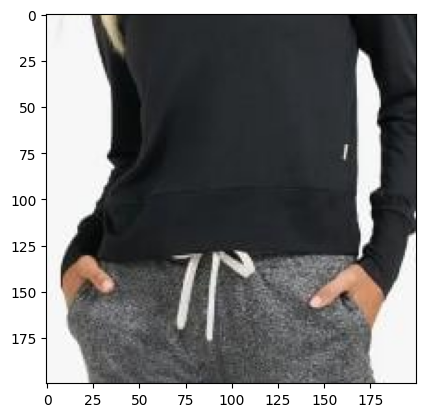

In [33]:
# Create the numpy array
image_array = np.array(original_image)

# Crop the center of the image
cropped_image = image_transforms.center_crop(image=image_array, size=(200, 200))

imgplot = plt.imshow(cropped_image)
plt.show()


### Creating an image classifier

Image classification is the process of labeling an image based on the
content. This is useful for many reasons from improving search to saving
agriculture crops from disease. It is also helpful for identifying
clothing items in fashion photos.

Build an image classification pipeline using a model trained on
identifying clothing items to classify the image you just cropped.

Both `pipeline` from the `transformers` library and the image, saved as
`cropped_image`, have already been loaded for you.

**Instructions**

- Create the image classifier pipeline using the model provided and save
  as `image_classifier`.
- Predict the class of the `cropped_image` and save as `results`.
- Print the predicted `"label"` of the result.

**Answer**


In [35]:
# added/edited
cropped_image = Image.open("fashion_cropped.jpeg")

In [36]:
# Create the pipeline
image_classifier = pipeline(task="image-classification", 
                      model="abhishek/autotrain_fashion_mnist_vit_base")

# Predict the class of the image
results = image_classifier(cropped_image)

# Print the results
print(results[0]["label"])


Pullover


### Document question and answering

Document question and answering is a multi-modal ML task which analyzes
an image of a document, such as a contract, converts it to text, and
allows a question to be asked about the text. This is useful when there
are many scanned documents which need to be searched, for example
financial records.

Build a pipeline for document question and answering, then ask the
pre-loaded question `Which meeting is this document about?`.

`pipeline` from the `transformers` library and the `question` are
already loaded for you. Note that we are using our own pipeline and dqa
functions to enable you to learn how to use these functions without some
of the extra setup. Please visit the Hugging Face documentation to dive
deeper.

**Instructions**

- Create a pipeline for `document-question-answering` and save as `dqa`.
- Save the path to the image, `document.png`, as `image`.
- Get the answer for the `question` of the `image` using the `dqa`
  pipeline and save as `results`.

**Answer**


In [39]:
pip install sentencepiece protobuf

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Create the pipeline
dqa = pipeline(task="document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa")

# Set the image and question
image = "document.png"
question = "Which meeting is this document about?"

# Get the answer
results = dqa(image=image, question=question)

print(results)


[{'answer': 'apple inc.'}]


### Visual question and answering

Visual question and answering is an ML task that attempts to provide the
best answer for a question about an image. The model will analyze the
content of the image and return a label as the answer.

For example, if asking about the clothes a model is wearing, the model
may return clothing items as the label. Such a task can be beneficial
for people who are visually impaired or as a classification method
(similar to image classification but more open-ended).

`pipeline` from the `transformers` library and both the `question` and
`image` are already loaded for you.

**Instructions**

- Create a visual question and answering pipeline by setting the `task`
  to `visual-question-answering` and save as `vqa`.
- Use the `vqa` pipeline to get an answer for the `image` and
  `question`, then save as `results`.

**Answer**


In [51]:
# added/edited
image = 'https://assets.datacamp.com/production/repositories/6536/datasets/ad0983f1eb5e12cb91ef28d6edb1d402bce745f2/jacob_original.jpeg'
question = 'What is the model wearing in this image?'

In [52]:
# Create pipeline
vqa = pipeline(task="visual-question-answering", model="dandelin/vilt-b32-finetuned-vqa")

# Use image and question in vqa
results = vqa(image=image, question=question)

print(results)


[{'score': 0.9795706272125244, 'answer': 'hat'}, {'score': 0.5232058763504028, 'answer': 'beanie'}, {'score': 0.24782012403011322, 'answer': 'cap'}, {'score': 0.180369570851326, 'answer': 'sweater'}, {'score': 0.02153942361474037, 'answer': 'hoodie'}]


### Resampling audio files

The sampling rate of an audio file determines the resolution. The higher
the sampling rate, the higher the resolution which provides more detail
about the sound wave itself.

When performing ML tasks it is important to ensure each file has the
same sampling rate. This will maintain consistency and prepare the audio
files based on what the model expects regarding number of data points
per audio file.

The dataset, `audio_file`, and `Audio` from the `datasets` library are
already loaded for you.

**Instructions**

- Save the old sampling rate, for reference, as `old_sampling_rate`.
- Resample the `audio` column to a new rate of 16,000 kHz and save to
  `audio_file`.
- Compare the old and new sampling rates.

**Answer**


In [ ]:
import pyarrow as pa

# Read the arrow file into memory
table = pa.ipc.open_file('common_language.arrow').read_all()

# Access the audio_file object
audio_file = table['audio_file']


In [ ]:
# Save the old sampling rate
old_sampling_rate = audio_file[1]["audio"]["sampling_rate"]

# Resample the audio files
audio_file = audio_file.cast_column("audio", Audio(sampling_rate=16_000))

# Compare the old and new sampling rates
print("Old sampling rate:", old_sampling_rate)
print("New sampling rate:", audio_file[1]["audio"]["sampling_rate"])


### Filtering out audio files

There will be occasions where you will want, or need, to filter a
dataset based on a specific criteria. A common example of this is
filtering for audio files that are under a specified duration.

The `librosa` and `numpy` libraries, as well as the `dataset`, have
already been loaded for you. Note: we have modified the `librosa`
library for the purposes of this exercise, but the functionality and
pattern is the same.

**Instructions**

- Loop over each `row` of the audio paths in the `dataset` and calculate
  the duration, appending to the `old_durations_list`.
- Create a new column called `duration` using `old_durations_list` and
  save to `dataset`.
- Filter the `dataset` for audio under 6.0 seconds using a lambda function and the column `duration`; save as `filtered_dataset`.
- Save the new durations as a list called `new_durations_list`.



**Answer**


In [ ]:
# Create a list of durations
old_durations_list = []

# Loop over the dataset
for row in dataset["path"]:
    old_durations_list.append(librosa.get_duration(path=row))

# Create a new column
dataset = dataset.add_column("duration", old_durations_list)


# Create a list of durations
old_durations_list = []

# Loop over the dataset
for row in dataset["path"]:
    old_durations_list.append(librosa.get_duration(path=row))

# Create a new column
dataset = dataset.add_column("duration", old_durations_list)

# Filter the dataset
filtered_dataset = dataset.filter(lambda d: d < 6.0, input_columns=["duration"], keep_in_memory=True)


# Create a list of durations
old_durations_list = []

# Loop over the dataset
for row in dataset["path"]:
    old_durations_list.append(librosa.get_duration(path=row))

# Create a new column
dataset = dataset.add_column("duration", old_durations_list)

# Filter the dataset
filtered_dataset = dataset.filter(lambda d: d < 6.0, input_columns=["duration"], keep_in_memory=True)

# Save new durations
new_durations_list = filtered_dataset["duration"]

print("Old duration:", np.mean(old_durations_list)) 
print("New duration:", np.mean(new_durations_list))


### Classifying audio files

Audio classification can be used for any task that requires labeling a
piece of audio based on its content. A common use case is identifying
spoken languages.

You will do just that using an example from the `common_language`
dataset. The model, `facebook/mms-lid-126` from Meta is a common model
used for this task given its coverage of languages.

`pipeline` from the `transformers` library as well as the `dataset` have
been loaded for you. It has been modified for the purposes of this
exercise.

**Instructions**

- Create the pipeline for audio classification and save as `classifier`.
- Extract the sample audio and sentence and save as `audio` and
  `sentence`, respectively.
- Predict the label for the audio using the `classifier` and save as
  `prediction`.

**Answer**


In [ ]:
# Create the pipeline
classifier = pipeline(task="audio-classification", model="facebook/mms-lid-126")

# Extract the sample
audio = dataset[1]["audio"]["array"]
sentence = dataset[1]["sentence"]

# Predict the language
prediction = classifier(audio)

print(f"Predicted language is '{prediction[0]['label'].upper()}' for the sentence '{sentence}'")


### Instantiating an ASR pipeline

You've been tasked with generating text from a dataset of audio files.
Accuracy is important, so you need to make sure you choose the best
model for automatic speech recognition. You also don't have the time to
train your own model.

Compare the predictions between the Wav2Vec and Whisper models by
instantiating two pipelines for automatic speech recognition. You want
to test out the functionality, so you should try it out on one example
first.

`pipeline` from the `transformers` package is already loaded for you.
Likewise, the dataset has already been loaded for you, resampled, and
saved as `english`. One audio file with it's associated metadata is
saved as `example`.

**Instructions**

- Instantiate the first automatic speech recognition pipeline for the
  "wav2vec2" model from Meta.
- Predict the text from the `example` audio.
- Repeat these two steps for the "whisper-tiny" model from OpenAI in
  order to compare the predictions.

**Answer**


In [ ]:
# Create an ASR pipeline using Meta's wav2vec model
meta_asr = pipeline(task="automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

# Predict the text from the example audio
meta_pred = meta_asr(example["audio"]["array"])["text"].lower()

# Repeat for OpenAI's Whisper model
open_asr = pipeline("automatic-speech-recognition", model="openai/whisper-tiny")
open_pred = open_asr(example["audio"]["array"])["text"].lower()

# Print the prediction from both models
print("META:", meta_pred)
print("OPENAI:", open_pred)


### Word error rate

The Wav2Vec and Whisper models predicted very similar text with only
some minor differences. Luckily, for the first this example record, you
have the true sentence for reference. You can use Word Error Rate (WER)
to determine which model quantitatively performed the best.

`load` from the `evaluate` package has already loaded for you. Likewise,
the `example` and predictions - `meta_pred` and `open_pred` - were saved
from the previous exercise.

**Instructions**

- Instantiate the word error rate metric object and save as `wer`.
- Save the true sentence of the example as `true_sentence`.
- Compute the word error rate for each model prediction and save as
  `meta_wer` and `open_wer`, respectively.

**Answer**


In [ ]:
# Create the word error rate metric
wer = load("wer")

# Save the true sentence of the example
true_sentence = example["sentence"].lower()

# Compute the wer for each model prediction
meta_wer = wer.compute(predictions=[meta_pred], references=[true_sentence])
open_wer = wer.compute(predictions=[open_pred], references=[true_sentence])

print(f"The WER for the Meta model is {meta_wer} and for the OpenAI model is {open_wer}")


### Iterating over a dataset

You were able test the functionality and understand the performance on
one example from the dataset. Now, let's evaluate the models over the
first 100 audio files to make a final decision about which is best for
this dataset.

In order to do this efficiently, you can create a function that will
iterate over the rows of the dataset and yield a set of audio and true
sentence pairs on each iteration.

The dataset, `english`, ASR models - `meta_asr` and `open_asr` - and
`pandas` have all been loaded for you.

**Instructions**

- Create the `data()` function to iterate over the first 3 rows of the
  dataset.
- Within `data()`, predict the text for each audio file using both the
  `meta_asr` and `open_asr` pipelines.
- Append the results as a dictionary in the `output` list.

**Answer**


In [ ]:
# Create the data function
def data(n=3):
    for i in range(n):
        yield english[i]["audio"]["array"], english[i]["sentence"].lower()
        
# Predict the text for the audio file with both models
output = []
for audio, sentence in data():
    meta_pred = meta_asr(audio)["text"].lower()
    open_pred = open_asr(audio)["text"].lower()
    # Append to output list
    output.append({"sentence": sentence, "metaPred": meta_pred, "openPred": open_pred})

output_df = pd.DataFrame(output)


# Create the data function
def data(n=3):
    for i in range(n):
        yield english[i]["audio"]["array"], english[i]["sentence"].lower()
        
# Predict the text for the audio file with both models
output = []
for audio, sentence in data():
    meta_pred = meta_asr(audio)["text"].lower()
    open_pred = open_asr(audio)["text"].lower()
    # Append to output list
    output.append({"sentence": sentence, "metaPred": meta_pred, "openPred": open_pred})

output_df = pd.DataFrame(output)

# Compute the WER for both models
metaWER = wer.compute(predictions=output_df["metaPred"], references=output_df["sentence"])
openWER = wer.compute(predictions=output_df["openPred"], references=output_df["sentence"])

# Print the WER
print(f"The WER for the meta model is {metaWER} and for the open model is {openWER}")


## Fine-tuning and Embeddings

### Preparing a dataset

Fine-tuning a model requires several steps including identifying the
model to fine-tune, preparing the dataset, creating the training loop
object, then saving the model.

A model trained on English text classification has been identified for
you, but it's up to you to prepare the imdb dataset in order to
fine-tune this model to classify the sentiment of movie reviews.

The imdb dataset is already loaded for you and saved as `dataset`.

**Instructions**

- Import `AutoModelForSequenceClassification` and `AutoTokenizer`.
- Load the model "distilbert-base-uncased-finetuned-sst-2-english" and save as `model`.
- Create a tokenizer object based on the model and save as `tokenizer`.
- Use `tokenizer` on the `text` in the dataset and save as `dataset`.

*Note: parameters are auto-set for the tokenizer and map functions to improve performance for this exercise.*

**Answer**


In [ ]:
# Import modules
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"


# Import modules
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Import modules
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Use tokenizer on text
dataset = dataset.map(lambda row: tokenizer(row["text"], padding=True, max_length=512, truncation=True), keep_in_memory=True)


### Building the trainer

To fine-tune a model, it must be trained on new data. This is the
process of the model learning patterns within a training dataset, then
evaluating how well it can predict patterns in an unseen test dataset.
The goal is to help the model build an understanding of patterns while
also being generalizable to new data yet to be seen.

Build a training object to fine-tune the
"distilbert-base-uncased-finetuned-sst-2-english" model to be better at
identifying sentiment of movie reviews.

The `training_data` and `testing_data` dataset are available for you.
`Trainer` and `TrainingArguments` from `transformers` are also loaded.
They were modified for the purpose of this exercise.

**Instructions**

- Create the training arguments object setting the output directory to
  `./results`.
- Create the trainer object by passing in the model, training arguments,
  `training_data` and `testing_data`.
- Start the trainer.

**Answer**


In [ ]:
# Create training arguments
training_args = TrainingArguments(output_dir="./results")

# Create the trainer
trainer = Trainer(
    model=model, 
    args=training_args, 
    train_dataset=training_data, 
    eval_dataset=testing_data
)

# Start the trainer
trainer.train()


### Using the fine-tuned model

Now that the model is fine-tuned, it can be used within `pipeline`
tasks, such as for sentiment analysis. At this point, the model is
typically saved to a local directory (i.e. on your own computer), so a
local file path is needed.

You'll use the newly fine-tuned distilbert model. There is a sentence,
"I am a HUGE fan of romantic comedies.", saved as `text_example`.

Note: we are using our own `pipeline` module for this exercise for
teaching purposes. The model is "saved" (i.e. not really) under the path
`./fine_tuned_model`.

**Instructions**

- Create the classifier pipeline for `"sentiment-analysis"` and use the
  model saved in `"./fine_tuned_model"`.
- Classify the text, `text_example`, and save the results as `results`.

**Answer**


In [ ]:
# Create the classifier
classifier = pipeline(task="sentiment-analysis", model="./fine_tuned_model")

# Classify the text
results = classifier(text=text_example)

print(results)


### Generating text from a text prompt

Generating text can be accomplished using Auto classes from the Hugging
Face `transformers` library. It can be a useful method for developing
content, such as technical documentation or creative material.

You'll walk through the steps to process the text prompt, "Wear
sunglasses when its sunny because", then generate new text from it.

`AutoTokenizer` and `AutoModelForCausalLM` from the `transformers`
library are already loaded for you.

**Instructions**

- Get the tokenizer and the model for 'gpt2' then save as `tokenizer`
  and `model`, respectively.
- Tokenize the `prompt` using the `tokenizer` and save as `input_ids`.
- Generate new text using the `model` and save as output.
- Decode the output and save as `generated_text`.

**Answer**


In [ ]:
# Set model name
model_name = "gpt2"

# Get the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


# Set model name
model_name = "gpt2"

# Get the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

prompt = "Wear sunglasses when its sunny because"

# Tokenize the input
input_ids = tokenizer.encode(prompt, return_tensors="pt")


# Set model name
model_name = "gpt2"

# Get the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

prompt = "Wear sunglasses when its sunny because"

# Tokenize the input
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate the text output
output = model.generate(input_ids, num_return_sequences=1)

# Decode the output
generated_text = tokenizer.decode(output[0])

print(generated_text)


### Generating a caption for an image

Generating text can be done for modalities other than text, such as
images. This has a lot of benefits including faster content creation by
generating captions from images.

You'll create a caption for a fashion image using the Microsoft GIT
model ("microsoft/git-base-coco").

`AutoProcessor` and `AutoModelForCausalLM` from the `transformers`
library is already loaded for you along with the `image`.

**Instructions**

- Get the processor and model and save with the same names,
  respectively.
- Process the `image` using the processor and save as `pixels`.
- Generate the output and save as `output`.
- Decode the `output` and save as `caption`.

**Answer**


In [ ]:
# Get the processor and model
processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

# Process the image
pixels = processor(images=image, return_tensors="pt").pixel_values

# Generate the ids
output = model.generate(pixel_values=pixels)

# Decode the output
caption = processor.batch_decode(output)

print(caption[0])


### Generate embeddings for a sentence

Embeddings are playing an increasingly big role in ML and AI systems. A
common use case is embedding text to support search.

The `sentence-transformers` package from Hugging Face is useful for
getting started with embedding models. You'll compare the embedding
shape from two different models - "all-MiniLM-L6-v2" and
"sentence-transformers/paraphrase-albert-small-v2". This can determine
which is better suited for a project (i.e. because of storage
constraints).

The sentence used for embedding, *"Programmers, do you put your comments
(before\|after) the related code?"*, is saved as `sentence`.

`SentenceTransformer` from the `sentence-transformers` package was
already loaded for you.

**Instructions**

- Create the first embedder using `SentenceTransformer` and the model
  `all-MiniLM-L6-v2`, then save as `embedder1`.
- Use `embedder1` to generate an embedding for the `sentence` and save
  as `embedding1`.
- Repeat these two steps for the `paraphrase-albert-small-v2` model.

**Answer**


In [ ]:
# Create the first embedding model
embedder1 = SentenceTransformer("all-MiniLM-L6-v2")

# Embed the sentence
embedding1 = embedder1.encode([sentence])

# Create and use second embedding model
embedder2 = SentenceTransformer("sentence-transformers/paraphrase-albert-small-v2")
embedding2 = embedder2.encode([sentence])
 
# Compare the shapes
print(embedding1.shape == embedding2.shape)

# Print embedding1
print(embedding1)


### Using semantic search

The similarity, or closeness, between a query and the other sentences,
or documents, is the foundation for semantic search. This is a search
method which takes into account context and intent of the query.
Similarity measures, such as cosine similarity, are used to quantify the
distance between the query and each sentence within the dimensional
space. Results of a search are based on the closest sentences to the
query.

You will use semantic search to return the top two Reddit threads
relevant to the user query, "I need a desktop book reader for Mac".

The `embedder` and `sentence_embeddings` are already loaded for you
along with `util.semantic_search()`.

**Instructions**

- Generate embeddings for the query and save as `query_embedding`.
- Use `util.semantic_search` to compare the query embedding with the
  sentence embeddings and save as `hits`.
- Complete the `for-loop` to print the results from `hits[0]`.

**Answer**


In [ ]:
query = "I need a desktop book reader for Mac"

# Generate embeddings
query_embedding = embedder.encode([query])[0]

# Compare embeddings
hits = util.semantic_search(query_embedding, sentence_embeddings, top_k=2)

# Print the top results
for hit in hits[0]:
    print(sentences[hit["corpus_id"]], "(Score: {:.4f})".format(hit["score"]))
